In [1]:
import pyximport
pyximport.install()
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
import gammapy
from gammapy.maps import Map
from gammapy.modeling import Fit,  Parameters, Covariance , Parameter
from gammapy.datasets import MapDataset ,Datasets
from gammapy.modeling.models import (
    PowerLawSpectralModel,
    SkyModel,
    PointSpatialModel,
    GaussianSpatialModel,
    Models,
    FoVBackgroundModel,
)
import sys
sys.path.append('/home/katrin/Documents/nuisance_summary/')
from Dataset_Creation import sys_dataset
import Dataset_load 

In [2]:
figformat = 'svg'

In [3]:
dataset_asimov = Dataset_load.create_asimov()

In [4]:
biass = [0.0]
biass_assumed = 0.1
sigmass = [0.0]
sigma_assumed = 1e-12

In [5]:
b = biass[0]; s = sigmass[0]

sys_d_cor = sys_dataset(dataset_asimov= dataset_asimov,
                    shift = 0,
                    tilt = 0,
                    bias = b, 
                    resolution = s,
                    rnd = False,
                    e_reco_creation=10)
dataset_conv = sys_d_cor.create_dataset()
dataset_conv_N = sys_d_cor.create_dataset_N(10)
#dataset_conv_N.models.parameters['resolution'].frozen  = True
dataset_conv_N.e_reco_n = 10
# new fine binned IRF Model
dataset_conv_N_fine =  sys_d_cor.create_dataset_N(100)

zero = 1e-12
penalising_invcovmatrix = np.zeros((4,4))
if b ==0 :
    b_ = zero
else:
    b_ = b
np.fill_diagonal(penalising_invcovmatrix, [1/biass_assumed**2, 1/zero**2, 1/zero**2, 1/zero**2])
dataset_conv_N.penalising_invcovmatrix = penalising_invcovmatrix
dataset_conv_N_fine.penalising_invcovmatrix = penalising_invcovmatrix
dataset_conv_N.irf_model.eff_area_model.parameters.freeze_all()
dataset_conv_N_fine.irf_model.eff_area_model.parameters.freeze_all()
#dataset_conv_N_fine.irf_model.eff_area_model = None
#dataset_conv_N.irf_model.eff_area_model = None

#datasets_conv = Datasets([dataset_conv])
#datasets_conv_N = Datasets([dataset_conv_N])
#datasets_conv_N_fine = Datasets([dataset_conv_N_fine])




ereco init
compute exposure
compute edisp
0.0
evaluate 0.0
ereco init
compute exposure
compute edisp
0.0
evaluate 0.0
ereco init
ereco init
compute exposure
compute edisp
0.0
evaluate 0.0
ereco init


In [6]:
def sum_e (data):
    return data.sum(axis=2).sum(axis=1)

eaxis_standard = dataset_asimov.geoms['geom'].axes[0]

In [7]:
print(dataset_conv_N)

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
MapDataset
----------

  Name                            : dataset N 

  Total counts                    : 361333 
  Total background counts         : 360331.31
  Total excess counts             : 1001.76

  Predicted counts                : 361331.59
  Predicted background counts     : 360331.34
  Predicted excess counts         : 1000.25

  Exposure min                    : 2.07e-01 m2 s
  Exposure max                    : 2.41e+11 m2 s

  Number of total bins            : 540000 
  Number of fit bins              : 180191 

  Fit statistic type              : cash
  Fit statistic value (-2 log(L)) : -753580.09

  Number of models                : 3 
  Number of parameters            : 16
  Number of free parameters       : 7

  Component 0: SkyModel
  
    Name                      : Source
    Datasets names            : None
    Spectral m

compute edisp
0.0
evaluate 0.0
compute exposure


<WCSAxesSubplot: >

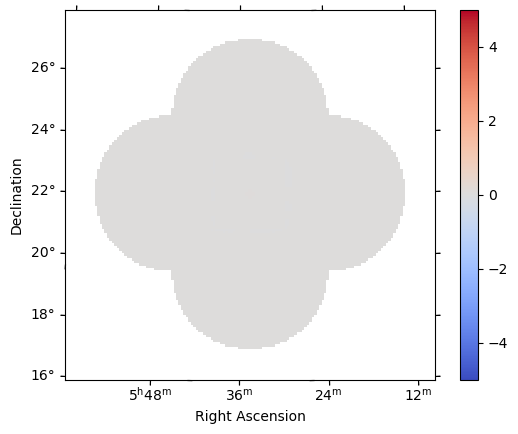

In [8]:
d = dataset_conv_N
d.plot_residuals_spatial()

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure


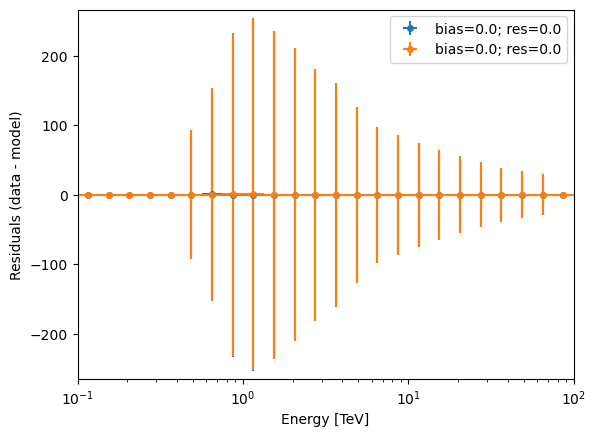

In [9]:
fig, ax = plt.subplots()
i = 0
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for b in biass:
    for s in sigmass:
        d = dataset_conv_N#[i]
        d.plot_residuals_spectral(ax =ax, color= colors[i], 
                    label = f"bias={b}; res={s}")
        d = dataset_conv_N_fine#[i]
        d.plot_residuals_spectral(ax =ax, color= colors[1], 
                    label = f"bias={b}; res={s}")
        i += 1
ax.legend()


compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure


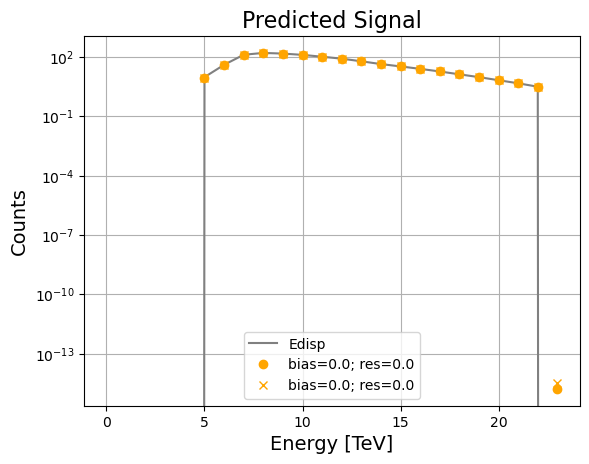

In [10]:
import matplotlib.pyplot as plt

# Your data processing code here

plt.title("Predicted Signal", fontsize=16)
i = 0 
fmts = ['o', 'x', '--', ':']
colors = ['orange', 'red', 'tab:blue', 'green']
plt.plot(sum_e(dataset_asimov.counts.data-dataset_asimov.background.data),
         label = "Edisp", color = 'grey')
npreds_pre_fit = []
npreds_pre_fit_N = []
npreds_pre_fit_N_fine = []
for b in biass:
    for s in sigmass:
        npreds_pre_fit.append( sum_e(dataset_conv.npred_signal().data))
        npreds_pre_fit_N.append( sum_e(dataset_conv_N.npred_signal().data))
        
        plt.plot( sum_e(dataset_conv.npred_signal().data),
                 fmts[i], label = f"bias={b}; res={s}", color = colors[i])
        plt.plot( sum_e(dataset_conv_N.npred_signal().data),
                 'x', label = f"bias={b}; res={s}", color = colors[i])
        i += 1
        
#plt.ylim(1e-1, 4e2)
plt.yscale('log')
plt.legend()
plt.xlabel("Energy [TeV]", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.grid(True)
fig = plt.gcf()
#fig.savefig(f"plots/1_Npred_bias={bias}sigma={sigma}.png", dpi=300, quality=95)

corr
┌─────────────────────────────────────────────────────────────────────────┐
│                                Migrad                                   │
├──────────────────────────────────┬──────────────────────────────────────┤
│ FCN = -7.536e+05                 │              Nfcn = 209              │
│ EDM = 3.02e-08 (Goal: 2e-06)     │            time = 4.4 sec            │
├──────────────────────────────────┼──────────────────────────────────────┤
│          Valid Minimum           │        No Parameters at limit        │
├──────────────────────────────────┼──────────────────────────────────────┤
│ Below EDM threshold (goal x 10)  │           Below call limit           │
├───────────────┬──────────────────┼───────────┬─────────────┬────────────┤
│  Covariance   │     Hesse ok     │ Accurate  │  Pos. def.  │ Not forced │
└───────────────┴──────────────────┴───────────┴─────────────┴────────────┘
┌───┬───────────────────┬───────────┬───────────┬────────────┬────────────┬────────

compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.04238723063628969
evaluate 0.04238723063628969
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.04238723063628969
evaluate 0.04238723063628969
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.04238723063628969
evaluate 0.04238723063628969
compute exposure
compute edisp
0.0
evaluate 0.0
compute exposure
compute edisp
0.04238723063628969
evaluate 0.04238723063628969
compute exposure
compute edisp
0.008298194106117422
evaluate 0.008298194106117422
compute exposure
compute edisp
0.003282780075586203
evaluate 0.003282780075586203
compute exposure
compute edisp
0.0015455877681341192
evaluate 0.0015455877681341192
compute exposure
compute edisp
0.0008742607089576325
evaluate 0.0008742607089576325
compute exposure
compute edisp
0.0008742607089576325
evaluate 0.0008742607089576325
compute exposure
compute edisp
0.00087426

compute edisp
0.0008644574807093182
evaluate 0.0008644574807093182
compute exposure
compute edisp
0.0008644384087099242
evaluate 0.0008644384087099242
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure
compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute e

'fit_cor_N_fine = Fit(store_trace=True)\nfit_cor_N_fine.optimize_opts = {"tol": 0.001, "strategy": 2}\nresult_cor_N_fine = fit_cor_N_fine.run(datasets_conv_N_fine)\ndatasets_conv_N_fine.models.covariance = fit_cor_N_fine.covariance(datasets_conv_N_fine).matrix\ndatasets_conv_N_fine.models.covariance.plot_correlation()\nprint(fit_cor_N_fine.minuit)'

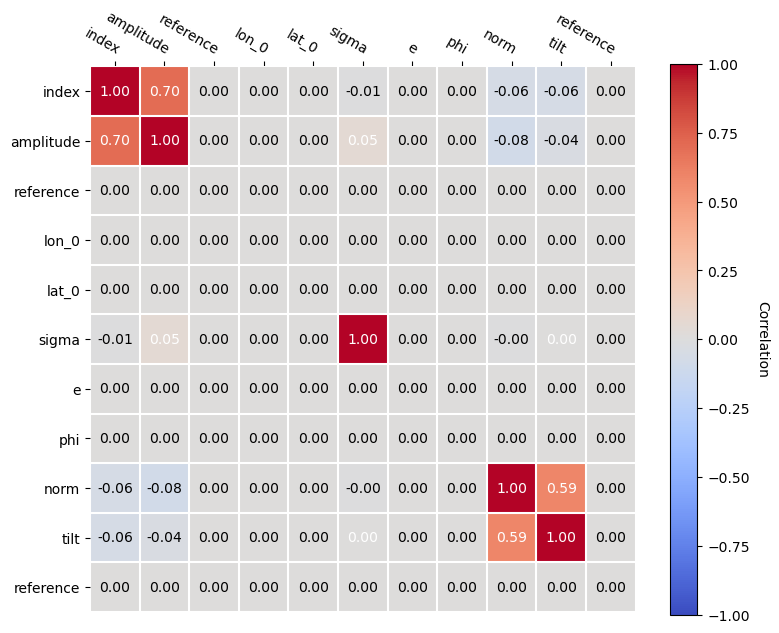

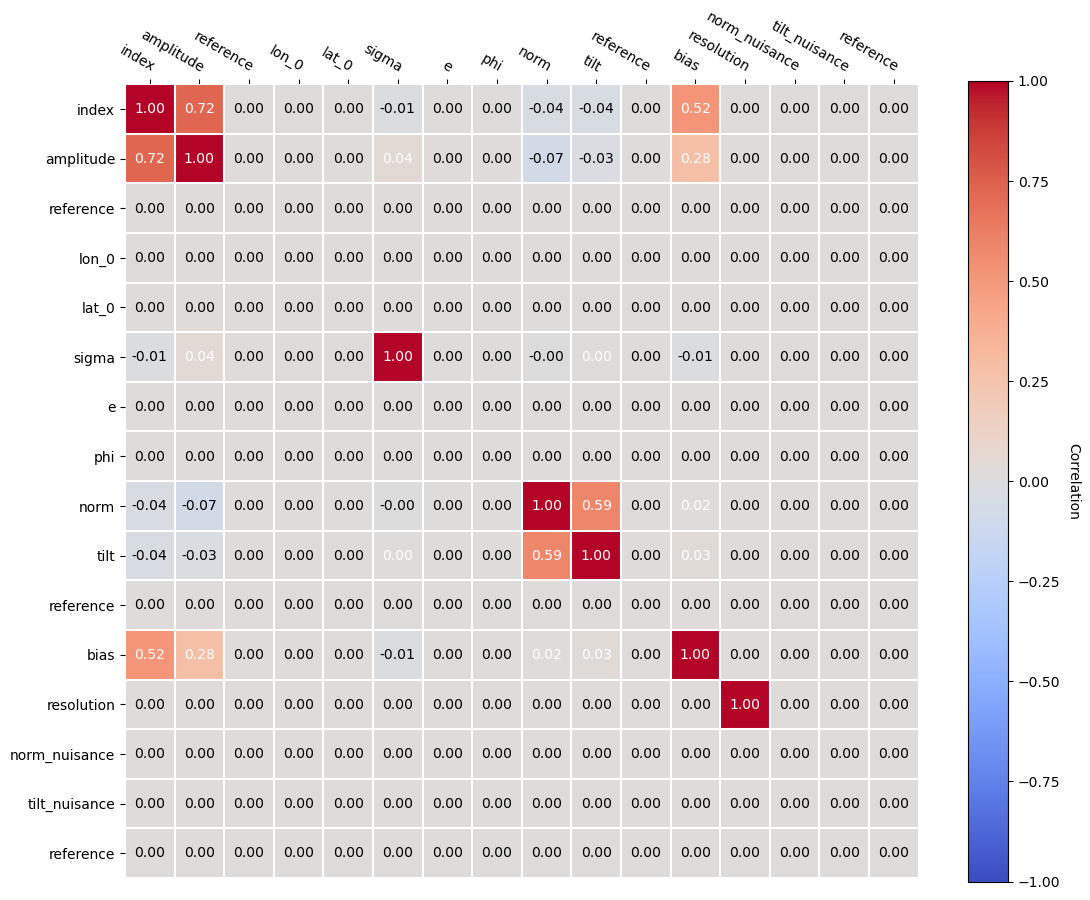

In [11]:
%%time
print("corr")
fit_cor = Fit(store_trace=True)
minuit_opts = {"tol": 0.001, "strategy": 2}
fit_cor.optimize_opts = minuit_opts
result_cor = fit_cor.run(dataset_conv)
dataset_conv.models.covariance = fit_cor.covariance(dataset_conv).matrix
dataset_conv.models.covariance.plot_correlation()
print(fit_cor.minuit)

fit_cor_N = Fit(store_trace=True)
fit_cor_N.optimize_opts = {"tol": 0.001, "strategy": 2}
result_cor_N = fit_cor_N.run(dataset_conv_N)
dataset_conv_N.models.covariance = fit_cor_N.covariance(dataset_conv_N).matrix
dataset_conv_N.models.covariance.plot_correlation()
print(fit_cor_N.minuit)
    
'''fit_cor_N_fine = Fit(store_trace=True)
fit_cor_N_fine.optimize_opts = {"tol": 0.001, "strategy": 2}
result_cor_N_fine = fit_cor_N_fine.run(datasets_conv_N_fine)
datasets_conv_N_fine.models.covariance = fit_cor_N_fine.covariance(datasets_conv_N_fine).matrix
datasets_conv_N_fine.models.covariance.plot_correlation()
print(fit_cor_N_fine.minuit)'''



        

In [12]:

saving = 1
if saving:
    path = f'data/2_model_nui_{biass[0]}_sigma_{sigmass[0]}.yml'
    dataset_conv_N.models.write(path,overwrite=True)
    
    path = f'data/2_model_{biass[0]}_sigma_{sigmass[0]}.yml'
    dataset_conv.models.write(path,overwrite=True)

In [13]:
colors_standard = ['darkblue', 'sienna', 'darkolivegreen', 'darkred']
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']


In [14]:

for p in dataset_conv_N.models.parameters.penalised_parameters:
    p.frozen = True

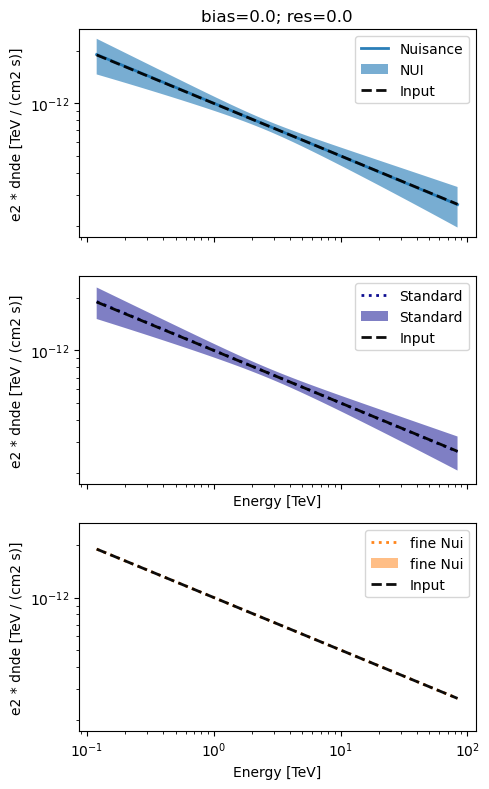

In [15]:
energy = dataset_conv.counts.geom.axes[0].center.value
energy_bounds = (energy[0], energy[-1] ) * u.TeV


fig,axs = plt.subplots(3,1, sharex = True, sharey=True, figsize = (5,8))
#axs = [axs]
i =0; ii =0
for b in biass:
    for s in sigmass:
        
        d = dataset_conv_N
    
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii],
                                                               color=colors[ii],
                                                                 label= f"Nuisance",
                                                                alpha = 0.95,
                                                               linestyle='-', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii],
                                                               facecolor=colors[ii],
                                                                 label="NUI",
                                                                alpha = 0.6)
        d = dataset_conv
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii+1],
                                                               color=colors_standard[ii],
                                                                 label= f"Standard",
                                                                alpha = 0.95,
                                                               linestyle=':', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii+1],
                                                               facecolor=colors_standard[ii],
                                                                 label="Standard",
                                                                alpha = 0.5)
        
        d = dataset_conv_N_fine
        d.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = axs[ii+2],
                                                               color=colors[ii+1],
                                                                 label= f"fine Nui",
                                                                alpha = 0.95,
                                                               linestyle=':', linewidth= 2)       

        d.models[0].spectral_model.plot_error(energy_bounds,  energy_power = 2, ax = axs[ii+2],
                                                               facecolor=colors[ii+1],
                                                                 label="fine Nui",
                                                                alpha = 0.5)
        
        axs[ii].set_title(f"bias={b}; res={s}")
        i +=1
        ii +=1
for a in axs:
    dataset_asimov.models[0].spectral_model.plot(energy_bounds,  energy_power = 2, ax = a,
                                                               color='black',
                                                                 label="Input",
                                                                alpha = 0.95,
                                                               linestyle='dashed', linewidth= 2)  
    a.legend()
    
ylim = axs[0].get_ylim()
axs[0].set_xlabel('')
plt.tight_layout()


compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure


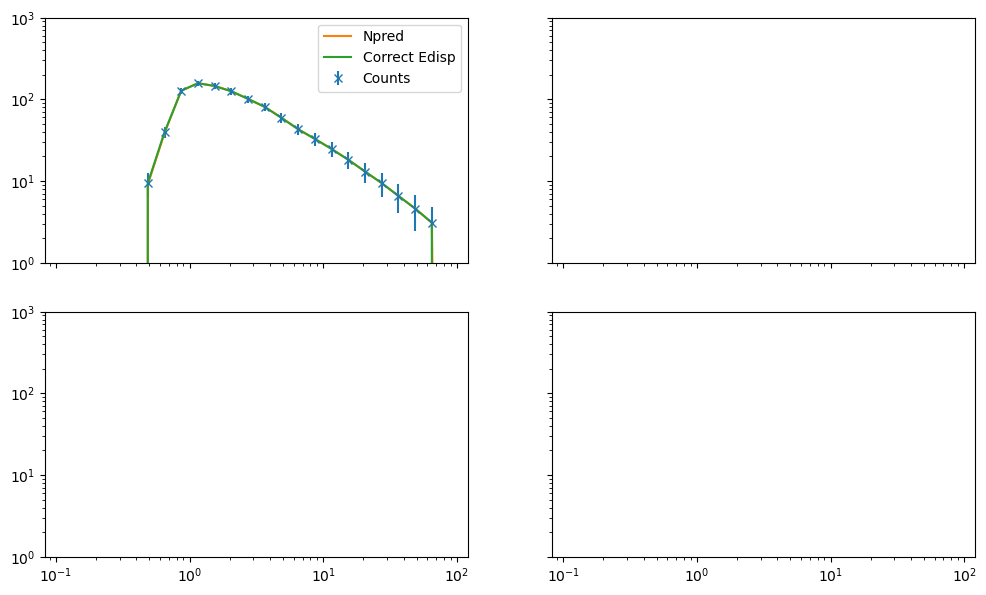

In [16]:
fig,axs = plt.subplots(2,2, sharex = True, sharey=True, figsize = (12,7))
axs = axs.flatten()
i =0; ii =0
for b in biass:
    for s in sigmass:
        d = dataset_conv_N
        axs[ii].errorbar(energy, sum_e(d.counts.data-d.background.data), 
                     yerr = np.sqrt(sum_e(d.counts.data-d.background.data)),
                    fmt = 'x', label = "Counts")

        axs[ii].plot(energy, sum_e(d.npred_signal().data), label = "Npred")
        axs[ii].plot(energy, sum_e(dataset_asimov.npred_signal().data), label = "Correct Edisp")
        
        
        
        axs[ii].loglog()
        axs[ii].legend()
        axs[ii].set_ylim(1e0, 1e3)        
        ii +=1
        


compute edisp
0.0008644238379614397
evaluate 0.0008644238379614397
compute exposure


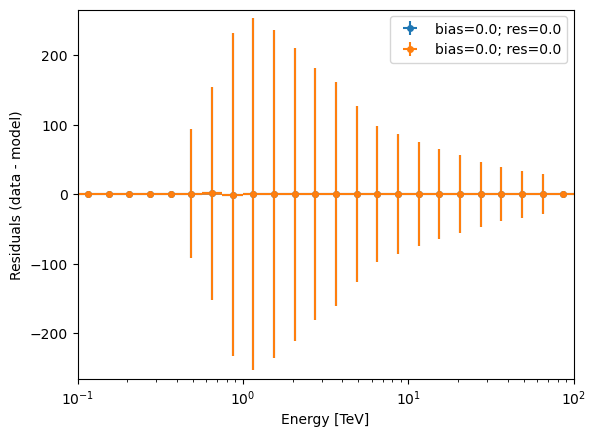

In [17]:
fig, ax = plt.subplots()
i = 0
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for b in biass:
    for s in sigmass:
        d = dataset_conv_N
        d.plot_residuals_spectral(ax =ax, color= colors[i], 
                    label = f"bias={b}; res={s}")
        d = dataset_conv
        d.plot_residuals_spectral(ax =ax, color= colors[i+1], 
                    label = f"bias={b}; res={s}")
        i += 1
ax.legend()


['Standard', 'B=0.0;\n R=0.0;\n nbin =1', 'B=0.0;\n R=0.0;\n nbin =10']


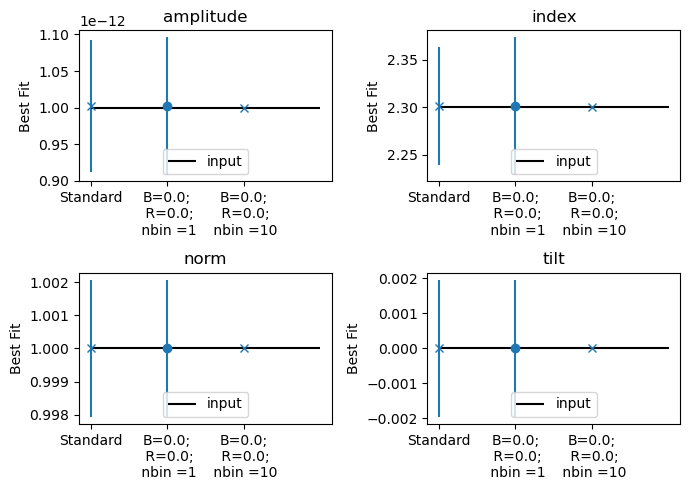

In [18]:
fig,ax  = plt.subplots(2,2,figsize= (7, 5))
ax = ax.flatten()
parnames = ['amplitude', 'index', 'norm', 'tilt']
labels_sys = []

ii =0;
for b in biass:
    for s in sigmass:
        d = dataset_conv
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(ii, value, yerr = error, fmt = 'x', color = colors[ii])
        labels_sys.append(f'Standard')
        
        d = dataset_conv_N
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(1, value, yerr = error, fmt = 'o', color = colors[ii])
        labels_sys.append(f'B={b};\n R={s};\n nbin =1')
            
        d = dataset_conv_N_fine
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(2, value, yerr = error, fmt = 'x', color = colors[ii])
        labels_sys.append(f'B={b};\n R={s};\n nbin =10')
            
        ii +=1
print(labels_sys)        
for i, p in enumerate(parnames):
    value = dataset_asimov.models.parameters[p].value
    error = dataset_asimov.models.parameters[p].error    
    #ax[i].errorbar(4, value, yerr = error, fmt = 'x')
    ax[i].hlines( value, 0, len(labels_sys), label = "input", color= 'black')
    ax[i].set_title(p)
    
    
for ax in ax:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), ncol = 1, 
            loc='lower center',)# bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Best Fit'); 
    #ax.set_xlabel('Systematic'); 
    ax.set_xticks(np.arange(len(labels_sys)),labels_sys)
    
plt.tight_layout()
    

['B=0.0;\n R=0.0;\n nbin =1', 'B=0.0;\n R=0.0;\n nbin =10']


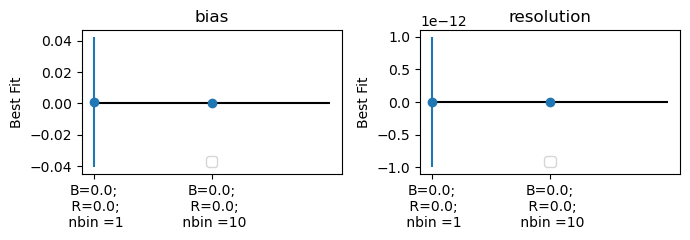

In [19]:
fig,ax  = plt.subplots(1,2,figsize= (7, 2.5))
ax = ax.flatten()
parnames = ['bias', 'resolution',]
labels_sys = []

ii =0;
for b in biass:
    for s in sigmass:
        d = dataset_conv_N
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(ii, value, yerr = error, fmt = 'o', color = colors[ii])
            ax[i].set_title(p)
        labels_sys.append(f'B={b};\n R={s};\n nbin =1')
            
        d = dataset_conv_N_fine
        for i, p in enumerate(parnames):
            value = d.models.parameters[p].value
            error = d.models.parameters[p].error    
            ax[i].errorbar(1, value, yerr = error, fmt = 'o', color = colors[ii])
            ax[i].set_title(p)    
            
        ii +=1
        labels_sys.append(f'B={b};\n R={s};\n nbin =10')
        
        
print(labels_sys)        
    
    
for ax in ax:
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), ncol = 1, 
            loc='lower center',)# bbox_to_anchor=(1, 0.5))
    ax.set_ylabel('Best Fit'); 
    #ax.set_xlabel('Systematic'); 
    ax.set_xticks(np.arange(len(labels_sys)),labels_sys)
    ax.hlines( 0, 0., len(labels_sys), label = "input", color= 'black')
    
plt.tight_layout()
    